# K-Means Clustering

Loading packages:

In [1]:
using Plots, Statistics
theme(:dark)

Creating our data:

In [9]:
cluster1 = [p for p in zip(rand(1:50, 20), rand(1:70, 20))]
cluster2 = [p for p in zip(rand(45:70, 20), rand(45:80, 20))]

# Consolidating our data
X = [x for x in cluster1]
for x in cluster2
    push!(X,x)
end

# Printing our data
X

40-element Array{Tuple{Int64,Int64},1}:
 (38, 7) 
 (15, 28)
 (27, 11)
 (41, 19)
 (21, 24)
 (15, 15)
 (24, 53)
 (1, 57) 
 (9, 69) 
 (7, 23) 
 (4, 61) 
 (47, 16)
 (11, 29)
 ⋮       
 (64, 58)
 (70, 78)
 (62, 67)
 (64, 66)
 (68, 76)
 (70, 65)
 (60, 79)
 (49, 55)
 (52, 62)
 (69, 72)
 (54, 55)
 (46, 77)

Creating our distance function:

In [10]:
distance(p1,p2) = sqrt((p1[1] - p2[1])^2 + (p1[2] - p2[2])^2)

distance (generic function with 1 method)

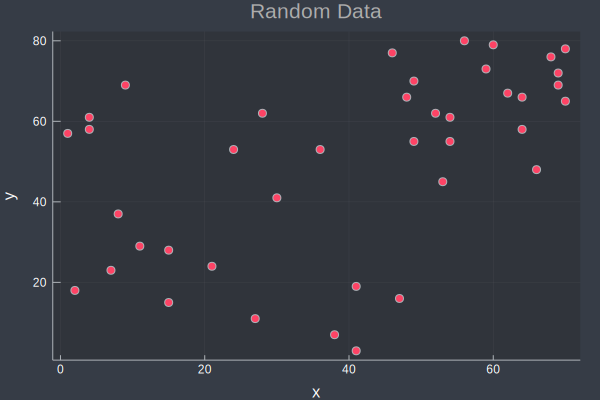

In [11]:
scatter(X, legend = false, xaxis =  "x", yaxis = "y", title =  "Random Data")

Defining our functions:

In [12]:
function k_means_assignment(X, centers, k)

    distances = []
    for p in X
        temp_distances = [(j, distance(p, centers[j])) for j = 1:length(centers)]
        sort!(temp_distances, by = x -> x[2])
        push!(distances, (p, temp_distances[1][1], temp_distances[1][2]))
    end
    
    new_centers = copy(centers)
    for j = 1:k
        new_centers[j] = (mean([x[1][1] for x in distances if x[2] == j]), 
                            mean([x[1][2] for x in distances if x[2] == j]))
    end
    
    return new_centers
end

function k_means_clustering(X, k, ϵ)
    centers = [(rand(0.0:70.0), rand(0.0:80.0)) for _ = 1:k]
    new_centers = k_means_assignment(X, centers, k)
    while maximum([distance(centers[i], new_centers[i]) for i = 1:k]) > ϵ
        centers, new_centers = new_centers, k_means_assignment(X, new_centers, k)
    end
    return new_centers
end

k_means_clustering (generic function with 1 method)

In [13]:
Centers = k_means_clustering(X, 2, 0.05)

2-element Array{Tuple{Float64,Float64},1}:
 (19.166666666666668, 31.61111111111111)
 (56.63636363636363, 65.31818181818181) 

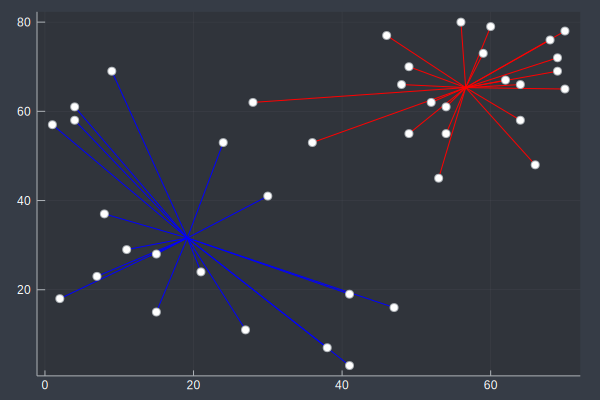

In [14]:
plot(legend = false)
for p in X
    temp_distances = [(j, distance(p, Centers[j])) for j = 1:2]
    sort!(temp_distances, by = x -> x[2])
    if temp_distances[1][1] == 1
        lcolor = "yellow"
    elseif temp_distances[1][1] == 2
        lcolor = "orange"
    else
        lcolor =  "red"
    end
    plot!([p, Centers[temp_distances[1][1]]], color = temp_distances[1][1] == 1 ? "blue" : "red")
end
scatter!(X, legend = false, color = "white")


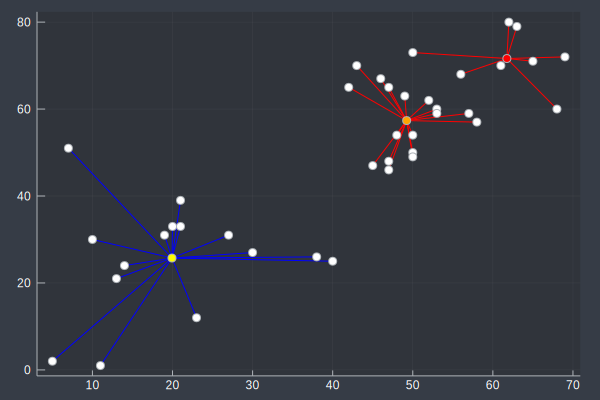

In [8]:
Centers = k_means_clustering(X, 3, 0.05)

plot(legend = false)
for p in X
    temp_distances = [(j, distance(p, Centers[j])) for j = 1:3]
    sort!(temp_distances, by = x -> x[2])
    
    if temp_distances[1][1] == 1
        lcolor = "yellow"
    elseif temp_distances[1][1] == 2
        lcolor = "orange"
    else
        lcolor = "red"
    end
    plot!([p, Centers[temp_distances[1][1]]], color = temp_distances[1][1] == 1 ? "blue" : "red")
end
scatter!(X, legend = false, color = "white")

# Putting nodes in the center of centers
scatter!([Centers[1]], color = "yellow")
scatter!([Centers[2]], color = "orange")
scatter!([Centers[3]], color = "red")